In [1]:
import numpy as np
from astropy import units as u
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

import scopesim as sim
from scopesim_templates.micado.spectral_calibrations import line_list

# Comment out if you used scopesim.download_packages(), 
# or change to the path of your local cloned version of the github IRDB directory
#sim.rc.__config__["!SIM.file.local_packages_path"] = "F:/Work/irdb"

### Make the line list input Source object

In [2]:
# unit_flux means a relative intensity of 1 = 3000 PHOTLAM [ph s-1 cm-2 AA-1]
# dwave = 1e-3 [nm] as discussed on slack --> change this to 1e-2 to speed up scopesim (maybe)
src_lines = line_list(unit_flux=3000, dwave=1e-3)

### Make the spectroscopic mode optical model

In [3]:
cmd = sim.UserCommands(use_instrument="MICADO", set_modes=["SCAO", "SPEC_3000x50"])
cmd["!OBS.dit"] = 3600
cmd["!OBS.filter_name_fw1"] = "Spec_HK"     # Spec_IJ, Spec_HK
cmd["!OBS.filter_name_fw2"] = "open"

micado = sim.OpticalTrain(cmd)

# The relay_psf and micado_ncpas_psf effects can be switched off,
# as these should have no effect on a slit-filling source. This
# reduces the memory footprint of the simulation.
micado["relay_psf"].include = False
micado["micado_ncpas_psf"].include = False

# Set to False to test if everything is working, then flip to True
USE_FULL_DETECTOR = False
micado["full_detector_array"].include = USE_FULL_DETECTOR
micado["detector_window"].include = not USE_FULL_DETECTOR

In [4]:
# This makes the perfect noiseless focal plane image
# This may take a while: ~order of mins
micado.observe(src_lines)

WARNING - Spectral trace footprint is outside FoV
WARNING - Spectral trace footprint is outside FoV
WARNING - Spectral trace footprint is outside FoV


### Plot the intermediate noiseless focal plane image

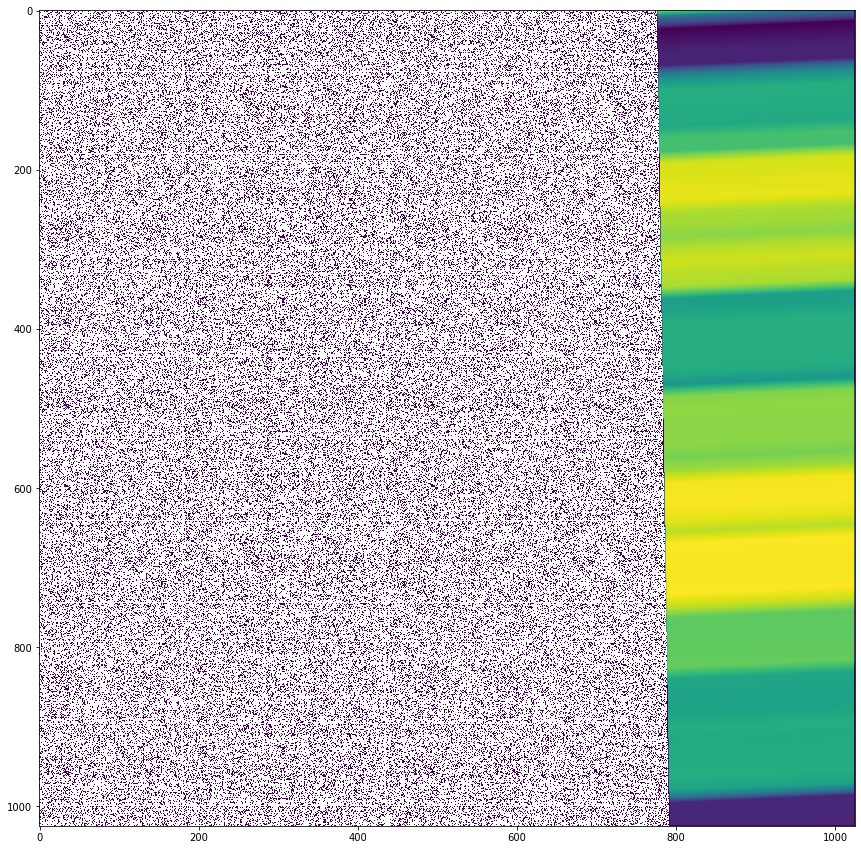

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(micado.image_planes[0].data, norm=LogNorm())

### This adds detector and shot noise

In [6]:
hdu = micado.readout()[0]

In [ ]:
# The intermediate and detector images are here in memory
# If you want to write them to disk, do this:
# micado.image_planes[0].hdu.writeto("img_plane_intermediate.fits")
# hdu.writeto("detector_final.fits")

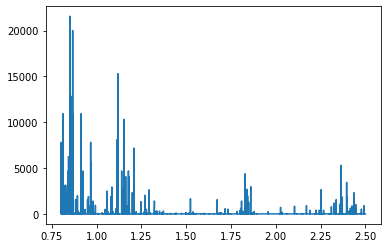

In [7]:
src_lines = line_list()

waves = np.arange(0.8, 2.5, 1e-7) * u.um
flux = src_lines.spectra[0](waves)

plt.plot(waves, flux)

### Display information about the elements in the MICADO optical train

In [8]:
# List all the effects included in MICADO
micado.effects

element,name,class,included
str11,str27,str29,bool
armazones,skycalc_atmosphere,SkycalcTERCurve,True
ELT,telescope_reflection,SurfaceList,True
MICADO,micado_static_surfaces,SurfaceList,True
MICADO,micado_ncpas_psf,NonCommonPathAberration,True
MICADO,filter_wheel_1 : [Spec_HK],FilterWheel,True
MICADO,filter_wheel_2 : [open],FilterWheel,True
MICADO,pupil_wheel : [open],FilterWheel,True
MICADO_DET,full_detector_array,DetectorList,False
MICADO_DET,detector_window,DetectorWindow,True


In [9]:
# Detailed info about each effect can be found in the .meta dictionaries
micado["filter_wheel_1"].meta

{'filename': None,
 'description': 'upper filter wheel',
 'history': [],
 'name': 'filter_wheel_1',
 'temperature': -190,
 'filter_file_format': 'filters/TC_filter_{}.dat',
 'element_name': 'MICADO',
 'filter_names': ['open',
  'xI1',
  'xI2',
  'Spec_IJ',
  'Spec_HK',
  'I-long',
  'Y',
  'J',
  'J-short',
  'J-long'],
 'filename_format': '!INST.filter_file_format',
 'current_filter': '!OBS.filter_name_fw1',
 'minimum_throughput': 0.000101,
 'outer': 0.2,
 'outer_unit': 'm',
 'z_order': [124, 224, 524],
 'include': True,
 'path': '',
 'report_plot_include': True,
 'report_table_include': True,
 'report_table_rounding': 4}